### Mini Project J&J Quaterly Earning Share(EPS) 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import yule_walker
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [19]:
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
df = pd.read_csv('./data/jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [9]:
fig = px.scatter(df, x=df.date, y=df.data, width=800, height=400, color_discrete_sequence=['#fcba03'],
                 title=' Quaterly EPS(J&J)', labels= {'date': 'Year','data':'EPS($)'})
fig.show()

In [10]:
## Log of the EPS and take its difference to make it stationary

df['data'] = np.log(df['data'])
df['data'] = df['data'].diff()

df = df.drop(df.index[0])
df.head()

,date,data
1,1960-04-01,-0.119545
2,1960-07-02,0.299517
3,1960-10-01,-0.658462
4,1961-01-01,0.326684
5,1961-04-02,0.123233


In [12]:
fig = px.line(df, x=df.date, y=df.data, width=800, height=400, color_discrete_sequence=['#fcba03'],
                 title=' Log Difference of Quaterly EPS(J&J)', labels= {'date': 'Year','data':'EPS($)'})
fig.show()

In [15]:
# Checking statistical properties of the data using ad fuller test to check the stationarity of the data
# If the p-values is less than 0.05, then the data is stationary and reject the null hypothesis
# https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

ad_fuller_result = adfuller(df['data'])
print(f"ADF Stats: {ad_fuller_result[0]}")
print(f"p-value: {ad_fuller_result[1]}")

ADF Stats: -4.317043945811843
p-value: 0.00041497314044405543


We will reject the null hypothesis and time series is stationary

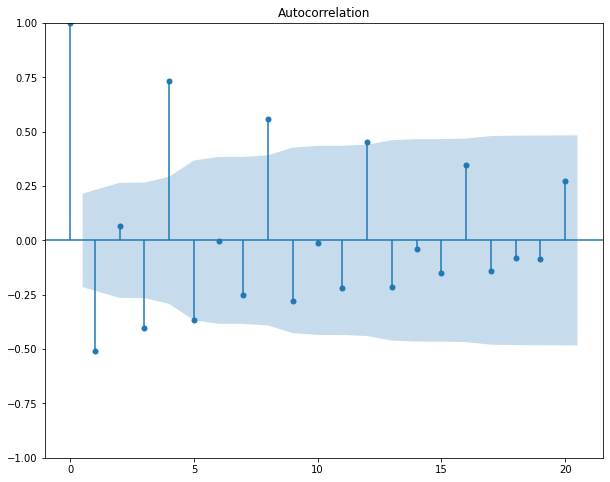

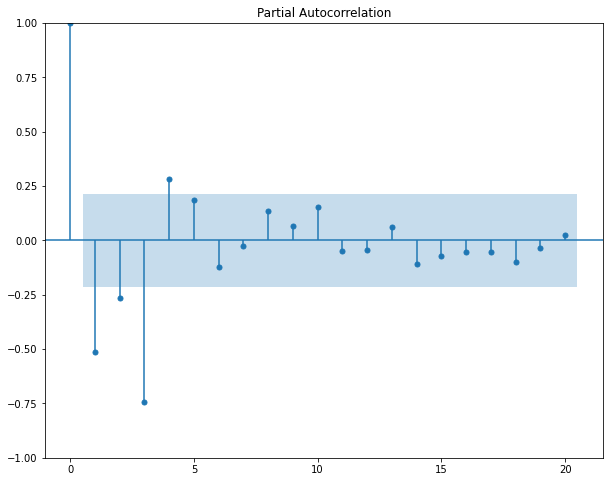

In [20]:
plot_acf(df.data)
plot_pacf(df.data)
plt.show()

The AR Process of order 4 will be a good approximation as the model

In [23]:
# AR(4)
rho, sigma = yule_walker(df.data, order=4)
print(f"rho: {-rho}")
print(f"sigma: {sigma}")

rho: [ 0.63642644  0.5364386   0.50578018 -0.27991345]
sigma: 0.11132979178317175
